# Project 14 Diabeties Prediction with GridSearchCV and CrossVal

## Lets Load the important libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes

## Loading the dataset

In [6]:
df=load_diabetes()

In [7]:
df.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [9]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
data=pd.DataFrame(df.data,columns=df.feature_names)
data['Target']=pd.DataFrame(df.target)

In [18]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
Target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
## Checking Null Values
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

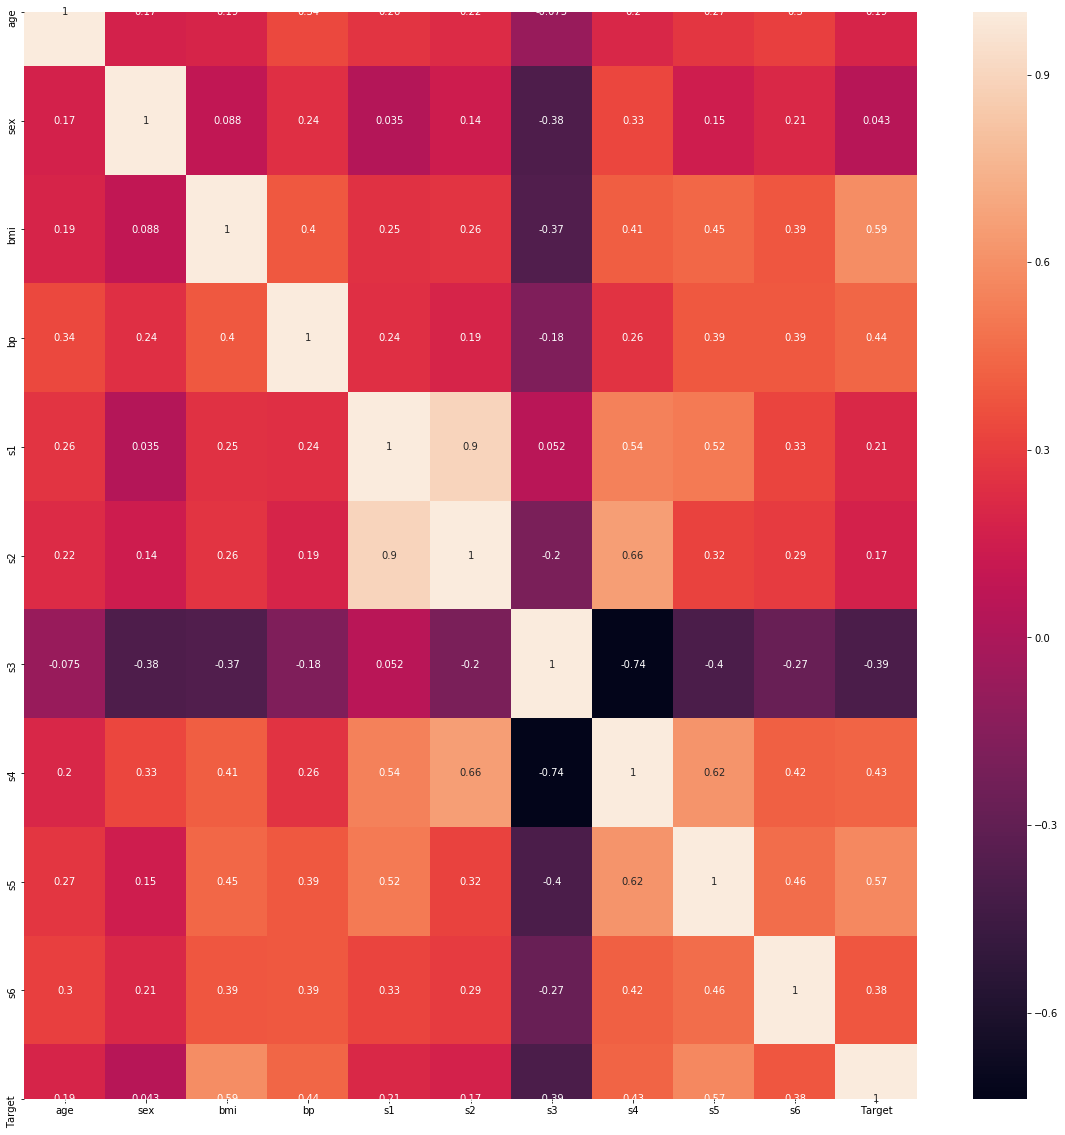

In [17]:
## Lets Check the correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

From the above we can see that the serum1 and serum2 are highly correlated with eachother, and most of our independent variables are postively correlated with our dependent variables which is good for our model.   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C14FFF8E08>,
      dtype=object)

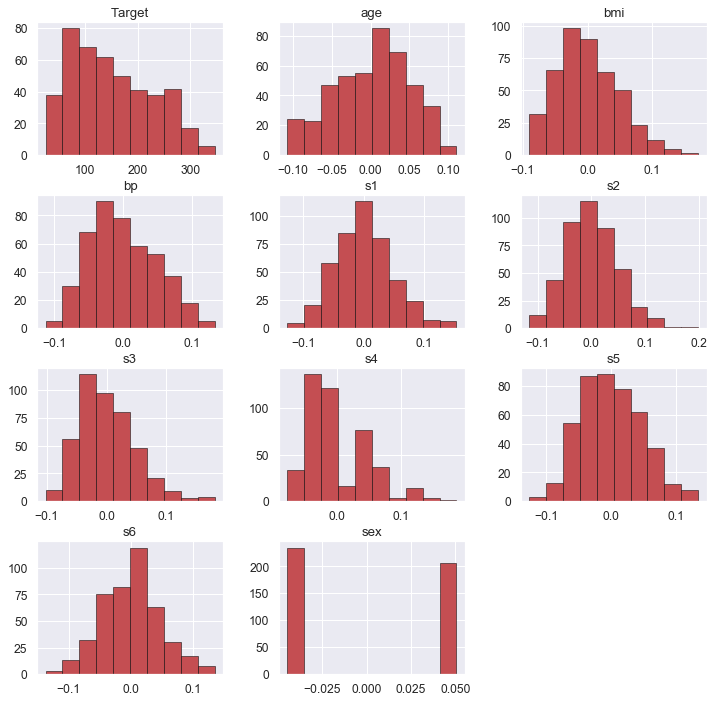

In [21]:
sns.set(style='darkgrid',font_scale=1.1)
data.hist(figsize=(12,12),color='r',edgecolor='black',linewidth=0.5)

From the above sets of graph we can see that few of our data are postively skewed, and most of features are evenly distributed. However we can't do the proper EDA as data is already scaled.

## Lets Split the dataset

In [29]:
x=data.iloc[:,:-1]
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [30]:
y=data['Target']
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=68)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((353, 10), (89, 10), (353,), (89,))

## Lets implement ML Algorithm

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [51]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=68)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=68)
RFR=RandomForestRegressor(random_state=68)
GBR=GradientBoostingRegressor(random_state=68)

In [52]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [53]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=8,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.5486379458292882
Mean_Squared_Error = 2275.5263252270433
Mean_Absolute_Error = 36.43093863106071
Root_Mean_Squared_Error = 47.70247713931681
Cross_Val_Score =  0.4577976919531376


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.39414250578678856
Mean_Squared_Error = 3054.409790719425
Mean_Absolute_Error = 46.149841591254514
Root_Mean_Squared_Error = 55.26671503463387
Cross_Val_Score =  0.3152232840597729


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, rando

In [54]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.548638,2275.526325,36.430939,47.702477,0.457798
1,Lasso,0.394143,3054.409791,46.149842,55.266715,0.315223
2,Ridge,0.471100,2666.429723,41.991707,51.637484,0.399629
3,DecisionTreeRegressor,-0.205018,6075.056180,60.224719,77.942647,-0.229098
4,AdaBoostRegressor,0.446227,2791.829997,42.549981,52.837771,0.397505
5,RandomForestRegressor,0.530119,2368.886966,38.240449,48.671213,0.369780
6,GradientBoostingRegressor,0.432805,2859.494863,42.035461,53.474245,0.381782


From the above we can see that LinearRegression and RandomForest Regressor is working best, however the socre is not that good as we don't have good data, however lets try hyperparameter tunning using GridSearchCV.

## Hyperparameter Tunning using GridsearchCV

In [ ]:
##RandomForest Classifier.
paraRFR = { 
            "n_estimators"      : [10,20,30,40,50,100,150,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth"         : [2,3,4,5],
            "min_samples_split" : [2,3,4],
            "min_samples_leaf"  : [2,3,4],
            "bootstrap"         : [True, False],
            }
gridRFR = GridSearchCV(RFR, param_grid=paraRFR, n_jobs=-1, cv=10)
gridRFR.fit(x_train, y_train)

In [ ]:
gridRFR.best_score_ , gridRFR.best_params_

In [ ]:
##GradientBoosting Regressor
paraGBR={'n_estimators':[20,50,100,200,300,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[2,3,4,5,6], 
            'min_samples_leaf':[3,2,1],
              'alpha':[0.5,0.9,0.8,0.6]
            }
gridGBR = GridSearchCV(GBR, param_grid=paraGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

In [ ]:
gridGBR.best_score_ , gridGBR.best_params_